## Average Duration of Treatments

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# mind the typo
vaso_df = pd.read_csv('../data/mimic-iii/final/vassopressors_mv_cohort.csv', usecols=['starttime', 'endtime'])
ivfl_df = pd.read_csv('../data/mimic-iii/final/inputevents_mv_cohort.csv', usecols=['starttime', 'endtime', 'amountuom'])

# conly consider unit=ml
ivfl_df = ivfl_df[ivfl_df.amountuom == 'ml']

# Compute Vasopressor and IV treatment durations
vaso_duration = (pd.to_datetime(vaso_df.endtime) - pd.to_datetime(vaso_df.starttime)) / pd.Timedelta(hours=1)
ivfl_duration = (pd.to_datetime(ivfl_df.endtime) - pd.to_datetime(ivfl_df.starttime)) / pd.Timedelta(hours=1)

# Remove outliers
vaso_duration = vaso_duration[(vaso_duration >= 0) & (vaso_duration < np.quantile(vaso_duration, 0.99))]
ivfl_duration = ivfl_duration[(ivfl_duration >= 0) & (ivfl_duration < np.quantile(vaso_duration, 0.99))]

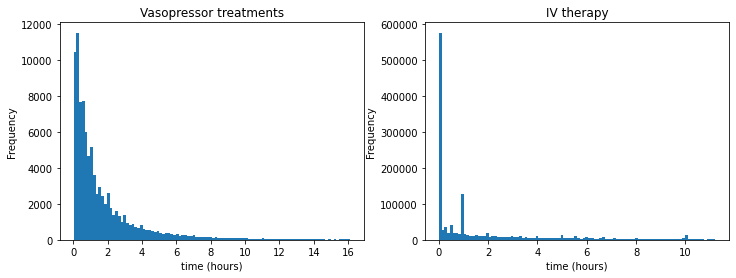

In [4]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(vaso_duration, bins=100)
plt.title('Vasopressor treatments')
plt.xlabel('time (hours)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(ivfl_duration, bins=100)
plt.title('IV therapy')
plt.xlabel('time (hours)')
plt.ylabel('Frequency');

## Why a spike in low-duration IV therapies?

In [17]:
ivfl_df = pd.read_csv('../data/mimic-iii/final/inputevents_mv_cohort.csv', usecols=['starttime', 'endtime', 'amount', 'ordercategoryname', 'amountuom'])

# only consider unit=ml
ivfl_df = ivfl_df[ivfl_df.amountuom == 'ml']

# Identify treatments <2 minutes
ivfl_duration = (pd.to_datetime(ivfl_df.endtime) - pd.to_datetime(ivfl_df.starttime)) / pd.Timedelta(minutes=1)
low_duration = ivfl_duration < 2

ivfl_df[low_duration].ordercategoryname.value_counts()

14-Oral/Gastric Intake      225047
08-Antibiotics (IV)         160709
01-Drips                     58801
03-IV Fluid Bolus            48142
10-Prophylaxis (IV)          26159
16-Pre Admission             15342
02-Fluids (Crystalloids)     12261
13-Enteral Nutrition          8062
05-Med Bolus                  4744
12-Parenteral Nutrition        625
07-Blood Products              569
04-Fluids (Colloids)           326
15-Supplements                  78
Name: ordercategoryname, dtype: int64

In [6]:
print('Total treatments:', len(ivfl_df))
print('Low-dim treatments:', len(ivfl_df[low_duration]))
print('Percentage treatments:', len(ivfl_df[low_duration]) / len(ivfl_df))

Total treatments: 1491663
Low-dim treatments: 560865
Percentage treatments: 0.3759998069268997


In [7]:
# What if we remove non-IV?
non_iv_categories = [
    '14-Oral/Gastric Intake',
    '09-Antibiotics (Non IV)',
    '13-Enteral Nutrition',
    '06-Insulin (Non IV)',
    '11-Prophylaxis (Non IV)',
    '16-Pre Admission',
    '09-Antibiotics (Non IV)'
]

# Drop Non-IV
ivfl_df = ivfl_df[~ivfl_df.ordercategoryname.isin(non_iv_categories)]

# Compute durations
ivfl_duration = (pd.to_datetime(ivfl_df.endtime) - pd.to_datetime(ivfl_df.starttime)) / pd.Timedelta(hours=1)
ivfl_df['duration'] = ivfl_duration

# Compute rate
ivfl_df['rate'] = ivfl_df.amount / ivfl_df.duration

# Remove outliers
ivfl_duration = ivfl_duration[(ivfl_duration >= 0) & (ivfl_duration < np.quantile(vaso_duration, 0.99))]

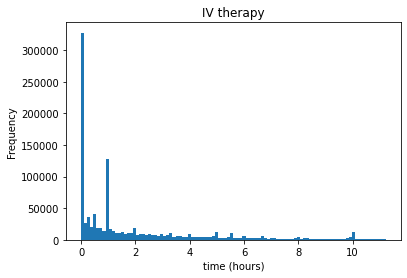

In [8]:
plt.hist(ivfl_duration, bins=100)
plt.title('IV therapy')
plt.xlabel('time (hours)')
plt.ylabel('Frequency');

In [15]:
ivfl_df.sample(frac=1).head(10)

,starttime,endtime,amount,amountuom,ordercategoryname,duration,rate
1105170,2126-07-24 11:00:00,2126-07-24 18:41:00,960.400055,ml,02-Fluids (Crystalloids),7.683333,124.997838
1881086,2153-12-16 07:45:00,2153-12-16 07:46:00,0.499118,ml,01-Drips,0.016667,29.947091
1659364,2117-09-18 21:16:00,2117-09-18 22:19:00,6.817683,ml,01-Drips,1.050000,6.493031
1401820,2132-06-28 16:20:00,2132-06-28 17:20:00,49.999999,ml,02-Fluids (Crystalloids),1.000000,49.999999
2038199,2176-08-29 21:54:00,2176-08-29 23:54:00,180.000000,ml,02-Fluids (Crystalloids),2.000000,90.000000
384660,2111-03-23 14:15:00,2111-03-23 14:16:00,100.000000,ml,08-Antibiotics (IV),0.016667,6000.000000
2743256,2151-04-29 09:00:00,2151-04-29 09:01:00,200.000000,ml,08-Antibiotics (IV),0.016667,12000.000000
2723569,2133-12-15 03:09:00,2133-12-15 03:10:00,200.000000,ml,03-IV Fluid Bolus,0.016667,12000.000000
1046163,2193-08-28 02:20:00,2193-08-28 05:18:00,59.164950,ml,01-Drips,2.966667,19.943242
2537749,2102-03-18 02:55:00,2102-03-18 05:27:00,759.166630,ml,02-Fluids (Crystalloids),2.533333,299.671038
